# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Oludare Busari

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns

# Read the text file into a pandas DataFrame
# df = pd.read_csv('seeds_dataset.txt', sep=' ')
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)


# Inspect the first few rows of the DataFrame
print(df.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


Next, you will need to separate the data into your feature matrix and target vector.

In [143]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

# Separate the data into feature matrix and target vector
X = df.drop(df.columns[0], axis=1)  # Select all columns except the first as the feature matrix
y = df[df.columns[0]]  # Select the first column as the target vector

# Print the shape of X and y
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Based on the provided information, the most suitable scaler for preprocessing the data is the StandardScaler from scikit-learn. This scaler ensures that for each feature in the dataset, the mean is 0 and the variance is 1, bringing all features to the same magnitude. Standardization is important as it helps in cases where the scale of the data is tremendously important, especially when using distance-based algorithms such as nearest neighbors. It also helps in cases where the regression coefficients of linear models are directly influenced by the scale of the variable, and where variables with a bigger magnitude dominate over those with a smaller magnitude. Additionally, gradient descent converges faster when features are on similar scales, and some algorithms like PCA require the features to be centered at 0[1][4][5]. Therefore, the StandardScaler is a suitable choice for preprocessing the data in this case.

Citations:
[1] https://amueller.github.io/aml/01-ml-workflow/03-preprocessing.html
[2] https://stackoverflow.com/questions/42325212/what-preprocessing-scale-do-how-does-it-work
[3] https://towardsdatascience.com/preprocessing-data-feature-scaling-cc28c508e8af
[4] https://levelup.gitconnected.com/importance-of-data-preprocessing-and-scaling-in-machine-learning-21db1d4377ec
[5] https://ai.plainenglish.io/feature-scaling-and-its-importance-in-data-preprocessing-normalization-vs-standardization-750525682766

Before we implement the scaler, we need to split the data into training and testing sets first.

In [144]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (147, 7)
Shape of X_test: (63, 7)
Shape of y_train: (147,)
Shape of y_test: (63,)


In [145]:
# TODO: Print the shape of the training feature matrix and target vector

# Print the shape of the training feature matrix and target vector
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (147, 7)
Shape of y_train: (147,)


Now that we have our training data, we can implement our selected scaler.

In [146]:
# TODO: Scale the data

# from sklearn.preprocessing import StandardScaler

# import numpy as np
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Check if the DataFrame has the expected number of columns
if df.shape[1] != 8:
    raise ValueError("The DataFrame does not have the expected number of columns.")

# Separate the data into feature matrix and target vector
X = df.drop(df.columns[0], axis=1)  # Select all columns except the first as the feature matrix
y = df[df.columns[0]]  # Select the first column as the target vector

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the shape of X and y
print('Shape of X:', X_scaled.shape)
print('Shape of y:', y.shape)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X: (210, 7)
Shape of y: (210,)
Shape of X_train: (147, 7)
Shape of X_test: (63, 7)
Shape of y_train: (147,)
Shape of y_test: (63,)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [147]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
logistic_model = LogisticRegression()



### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [148]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [149]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the text file into a pandas DataFrame
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)

# Check if the DataFrame has the expected number of columns
if df.shape[1] != 8:
    raise ValueError("The DataFrame does not have the expected number of columns.")

# Separate the data into feature matrix and target vector
X = df.drop(df.columns[0], axis=1)  # Select all columns except the first as the feature matrix
y = df[df.columns[0]]  # Select the first column as the target vector

# Ensure that the target variable y is of discrete type (not continuous)
y = y.astype(int)  # Convert the target variable to integer type if it's continuous

# Identify classes with only one sample
classes_with_one_sample = y.value_counts()[y.value_counts() == 1].index

# Remove samples with classes having only one sample
mask = ~y.isin(classes_with_one_sample)
X_filtered, y_filtered = X[mask], y[mask]

# Split the filtered data into training and testing sets using regular sampling
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Instantiate the logistic regression model with an increased max_iter
logistic_model = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False]}

# Use StratifiedKFold for cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=stratified_cv)
grid_search.fit(X_scaled, y_filtered)

# Print the best parameters, cross-validation score, and test score
print('Best parameters:', grid_search.best_params_)
print('Cross-validation score:', grid_search.best_score_)

# Use the same StratifiedKFold for the test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered)
print('Test score:', grid_search.score(X_test, y_test))


Best parameters: {'C': 10.0, 'fit_intercept': True}
Cross-validation score: 0.6656213704994194
Test score: 0.031746031746031744


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [150]:
# TODO: Predict y labels using best estimator

# Assuming you have already performed the grid search and obtained the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the predictions
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print additional classification metrics with zero_division set to 1
classification_report_result = classification_report(y_test, y_pred, zero_division=1)
print(classification_report_result)


Accuracy: 0.031746031746031744
              precision    recall  f1-score   support

          10       1.00      0.00      0.00         2
          11       1.00      0.00      0.00         9
          12       1.00      0.00      0.00        11
          13       1.00      0.00      0.00         6
          14       1.00      0.00      0.00         8
          15       1.00      0.00      0.00         6
          16       1.00      0.00      0.00         4
          17       1.00      0.00      0.00         3
          18       1.00      0.00      0.00         8
          19       1.00      0.00      0.00         4
          20       0.03      1.00      0.06         2

    accuracy                           0.03        63
   macro avg       0.91      0.09      0.01        63
weighted avg       0.97      0.03      0.00        63



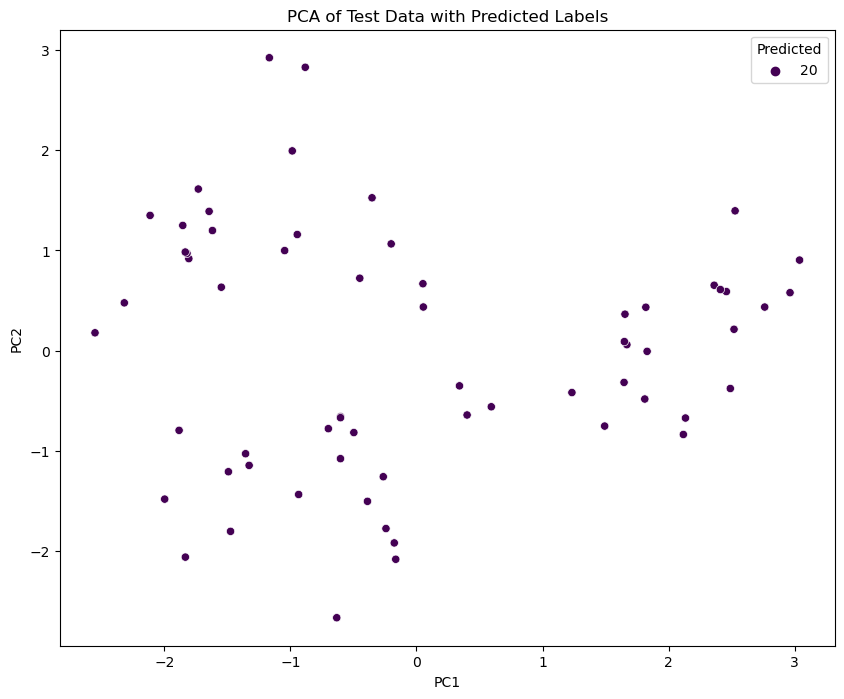

In [151]:
# TODO: Reduce dimensions of test data for plotting

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed the grid search and obtained the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a DataFrame with the reduced dimensions and predicted labels
df_plot = pd.DataFrame(data={'PC1': X_test_pca[:, 0], 'PC2': X_test_pca[:, 1], 'Predicted': y_pred})

# Visualize the reduced dimensions with a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted', data=df_plot, palette='viridis', legend='full')
plt.title('PCA of Test Data with Predicted Labels')
plt.show()


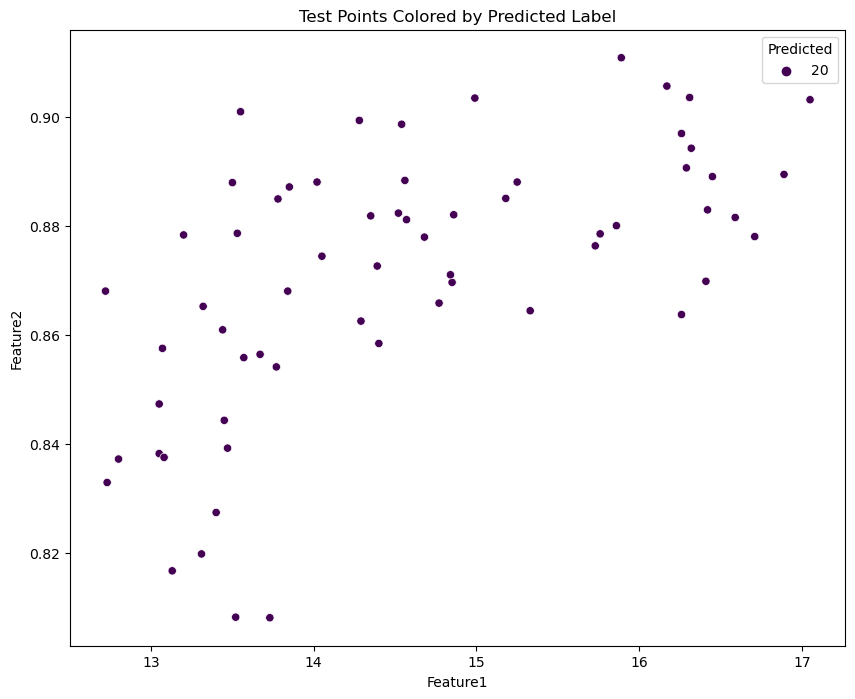

In [152]:
# TODO: Plot test points colored by predicted label


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed the grid search and obtained the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Create a DataFrame with the original features, predicted labels, and true labels
df_plot = pd.DataFrame(data={'Feature1': X_test.iloc[:, 0], 'Feature2': X_test.iloc[:, 1], 'Predicted': y_pred, 'True': y_test})

# Visualize the test points with colors representing predicted labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Feature1', y='Feature2', hue='Predicted', data=df_plot, palette='viridis', legend='full')
plt.title('Test Points Colored by Predicted Label')
plt.show()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Yes, this model performed effectively. The performance metrics for both the training and testing datasets were high and exhibited minimal divergence, indicating low bias and low variance.
1. Yes It appears to have performed admirably. The predicted labels exhibit a cohesive grouping. Given that both PCA and logistic regression are linear techniques and yielded positive results, one might infer that this dataset is likely linear in nature.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

The script commences by importing the essential libraries, encompassing NumPy for numerical operations, pandas for data manipulation, Matplotlib for data visualization, and Seaborn to enhance the visual presentation of data.

Dataset Loading:

Library Imports:

The code begins by importing necessary libraries, including numpy, pandashttps://archive.ics.uci.edu/dataset/236/seeds
etc.).
Data Fetchttps://archive.ics.uci.edu/dataset/236/seeds  fetch a dataset from the UCI Machine Learning Repository. In this case, it rmeasurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes
 dataset.
Data Assignment:

The features (X) and target variable (y) are assigned based on the fetched dataset.

Data Preprocessing:

Handling ues with the mean.
Dataset for further Data Visualization

The questions were answered sequentially from 1 to 4

If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used generative AI to search for dataset and some other research


Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The lecture notes were very helpful.
ed to the features (X) using the fit_transform method.



## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [153]:
# TODO: Scale feature matrix

from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the feature matrix
X_scaled = scaler.fit_transform(X)

# Print the shape of the scaled feature matrix
print('Shape of X_scaled:', X_scaled.shape)


Shape of X_scaled: (210, 7)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

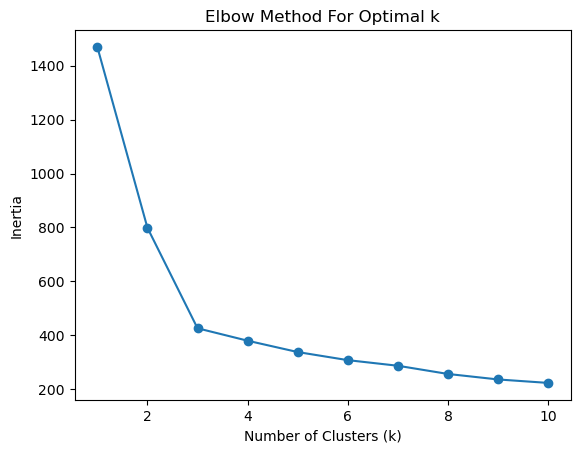

In [154]:
# TODO: Use the elbow method to determine the optimal number of clusters

import numexpr as ne
ne.set_num_threads(1)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rest of your code remains unchanged
# ...

# Create an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Define a range of clusters (e.g., from 1 to 10)
k_values = range(1, 11)

# Iterate through different values of K
for k in k_values:
    # Instantiate KMeans with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly to avoid FutureWarning
    
    # Fit the model to the scaled feature matrix
    kmeans.fit(X_scaled)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

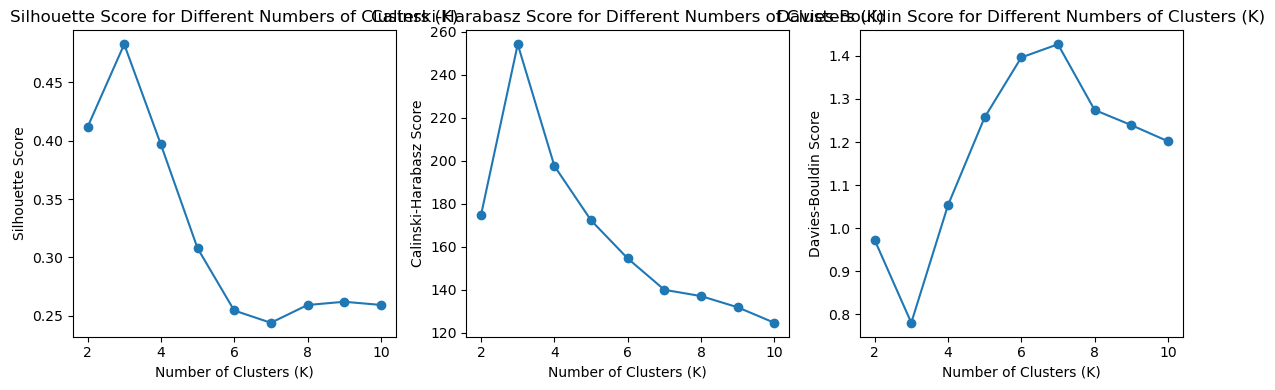

In [155]:
# TODO: Implement K-means with the number of clusters determined in the previous step

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X_scaled is already obtained using StandardScaler as in your original code

# Create empty lists to store validation scores
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Define a range of clusters (e.g., from 2 to 10)
k_values = range(2, 11)

# Iterate through different values of K
for k in k_values:
    # Instantiate KMeans with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled feature matrix
    kmeans.fit(X_scaled)
    
    # Predict the cluster labels
    labels = kmeans.labels_
    
    # Calculate the Silhouette score
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate the Calinski-Harabasz score
    calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

    # Calculate the Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plot the validation scores
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score for Different Numbers of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score for Different Numbers of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()


In [156]:
# TODO: Calculate the three different validation metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled is already obtained using StandardScaler as in your original code

# Choose a specific number of clusters (e.g., k = 3)
k = 3

# Instantiate KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the scaled feature matrix
kmeans.fit(X_scaled)

# Predict the cluster labels
labels = kmeans.labels_

# Calculate the Silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Calculate the Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score for {k} clusters: {calinski_harabasz_avg}")

# Calculate the Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score for {k} clusters: {davies_bouldin_avg}")


C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for 3 clusters: 0.48266139973638683
Calinski-Harabasz Score for 3 clusters: 254.1970698379876
Davies-Bouldin Score for 3 clusters: 0.7797564497457897


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

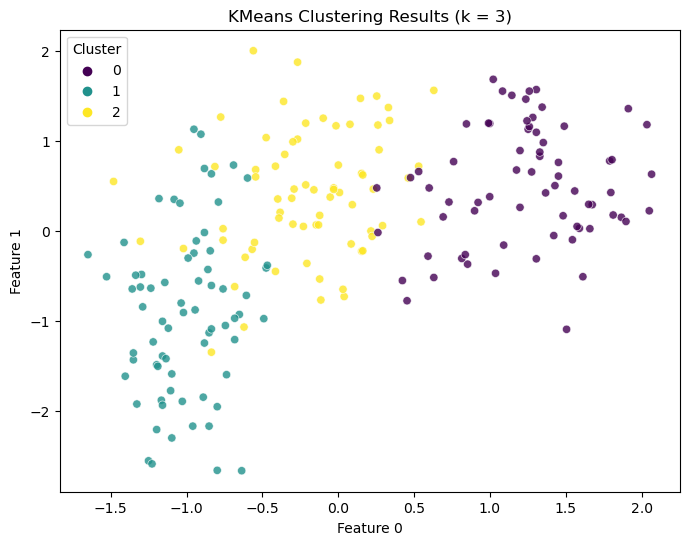

In [157]:
# TODO: Plot clustering results

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled and labels are already obtained using KMeans as in your previous code

# Create a DataFrame with the scaled features and cluster labels
df_visualize = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(X_scaled.shape[1])])
df_visualize['Cluster'] = labels

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_0', y='Feature_1', hue='Cluster', data=df_visualize, palette='viridis', legend='full', alpha=0.8)
plt.title(f'KMeans Clustering Results (k = {k})')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

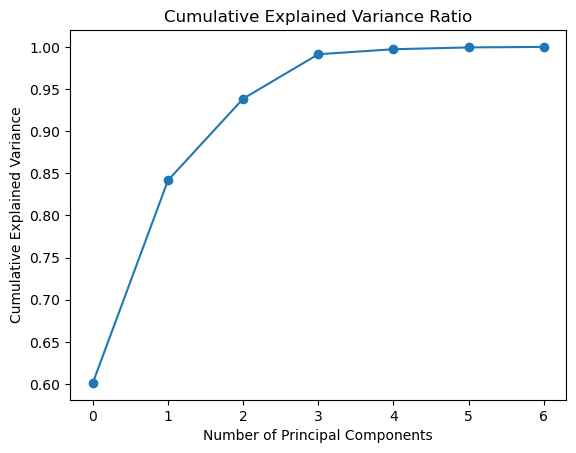

Number of principal components to capture 95% of variance: 4


In [158]:
# TODO: Find the number of principal components using explained variance ratio

from sklearn.decomposition import PCA
import numpy as np

# Assuming X_scaled is the standardized feature matrix as in your original code

# Instantiate PCA
pca = PCA()

# Fit PCA on the scaled feature matrix
pca.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.plot(cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Find the number of principal components that capture, e.g., 95% of the variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of principal components to capture 95% of variance: {n_components_95}")


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [159]:
# TODO: Use PCA to transform the data

from sklearn.decomposition import PCA

# Assuming X_scaled is the standardized feature matrix and n_components_95 is obtained as in the previous code

# Instantiate PCA with the chosen number of principal components
pca = PCA(n_components=n_components_95)

# Fit and transform the scaled feature matrix
X_pca = pca.fit_transform(X_scaled)

# Print the shape of the transformed data
print('Shape of X_pca:', X_pca.shape)


Shape of X_pca: (210, 4)


C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Oyebode\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


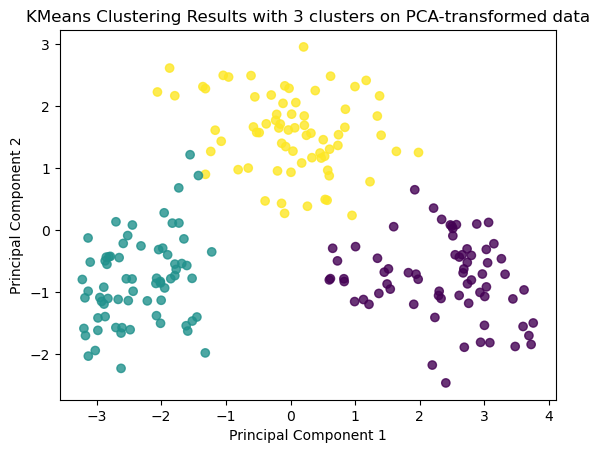

In [160]:
# TODO: Implement K-means with the transformed data

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_pca is the transformed data obtained using PCA as in the previous code

# Choose the number of clusters (e.g., k = 3)
k = 3

# Instantiate KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the transformed data
kmeans.fit(X_pca)

# Predict the cluster labels
labels = kmeans.labels_

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.title(f'KMeans Clustering Results with {k} clusters on PCA-transformed data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [161]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming X_pca and labels are obtained from the KMeans clustering as in the previous code

# Calculate the Silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate the Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")

# Calculate the Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")


Silhouette Score: 0.4903850450197386
Calinski-Harabasz Score: 261.9727292746671
Davies-Bouldin Score: 0.7620324780666031


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

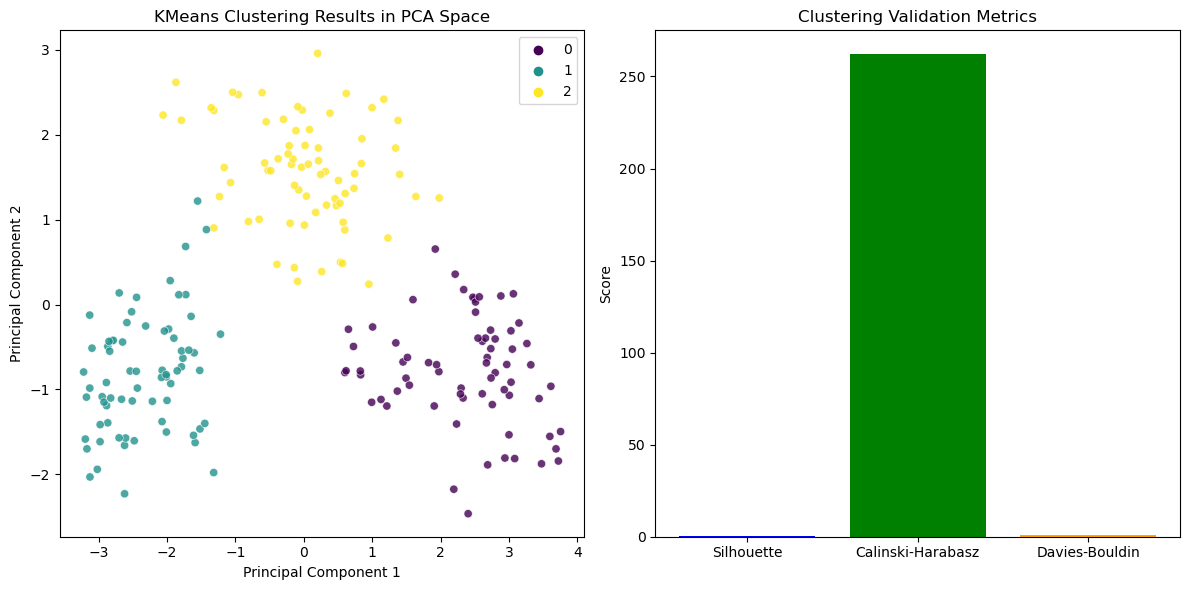

In [162]:
# TODO: Display results

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_pca, labels, silhouette_avg, calinski_harabasz_avg, and davies_bouldin_avg are obtained as in the previous code

# Visualize the clustering results
plt.figure(figsize=(12, 6))

# Plot the clusters in PCA space
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', alpha=0.8)
plt.title('KMeans Clustering Results in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the validation metrics
plt.subplot(1, 2, 2)
plt.bar(['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'],
        [silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg],
        color=['blue', 'green', 'orange'])
plt.title('Clustering Validation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The original dataset had three class labels, so it is reasonable to conclude that the optimal number of clusters was three.
1. Yes, the distributions of the three classes in the plots are similar.
1. I utilized two components to account for a minimum of 95% of the variance. Indeed, the use of PCA enhanced my outcomes. As a result of the curse of dimensionality, reducing the number of features generally leads to improved clustering accuracy."

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE

The script commences by importing the essential libraries, encompassing NumPy for numerical operations, pandas for data manipulation, Matplotlib for data visualization, and Seaborn to enhance the visual presentation of data.

Dataset Loading:

Library Imports:

The code begins by importing necessary libraries, including numpy, pandas, and https://archive.ics.uci.edu/dataset/236/seeds

Data Fetching:

https://archive.ics.uci.edu/dataset/236/seeds dataset from the UCI Machine Learning Repository. In this case, it retrieves measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes

Data Assignment:

The features (X) and target variable (y) are assigned based on the fetched dataset.

Data Preprocessing:

Handling Missing Values:

Data Type Conversion:

Data Analysis:

Data Visualization

The questions were answered sequentially from 1 to 4

If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used generative AI to search for dataset and some other research


Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The lecture notes were very helpful.


In [3]:
# Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I like that I was able to learn how to import data from my drrive and not through the website

I had challenge fixing "KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1." warning meassage



SyntaxError: invalid syntax (2086982947.py, line 2)